<a href="https://colab.research.google.com/github/pranshumittal08/Projects/blob/master/Geely_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as pe
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [2]:
#Uploading local file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv
User uploaded file "CarPrice_Assignment.csv" with length 26717 bytes


In [0]:
#Reading the CSV file
import io
data = pd.read_csv(io.StringIO(uploaded['CarPrice_Assignment.csv'].decode('UTF-8')))


In [31]:
#Creating a DataFrame for the CarPrice data
carprice_df = pd.DataFrame(data)
carprice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [32]:
carprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data Preprocessing

In [33]:
#Splitting the carName column into Company and Model name
car_name_df = carprice_df.CarName.str.split(n = 1, expand = True)
carprice_df.insert(loc = 2,column = "car_name", value = car_name_df[1])
carprice_df.insert(loc = 2,column = "car_company", value = car_name_df[0])
carprice_df.drop(columns = "CarName", inplace = True)
carprice_df.head()

,car_ID,symboling,car_company,car_name,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [34]:
carprice_df.car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [36]:
#Removing error from names of car companies
carprice_df.car_company.replace(to_replace = ["Nissan","porcshce", "toyouta","maxda", "vokswagen", "vw"], value = ["nissan", "porsche","toyota","mazda", "volkswagen","volkswagen"], inplace = True)
carprice_df.car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [47]:
print("Fuel Types---", carprice_df.fueltype.unique())
print("aspiration---", carprice_df.aspiration.unique())
print("doornumber---", carprice_df.doornumber.unique())
print("carbody---", carprice_df.carbody.unique())
print("Drivewheel---", carprice_df.drivewheel.unique())
print("Engine Location---", carprice_df.enginelocation.unique())
print("Engine Type---", carprice_df.enginetype.unique())
print("Cylinder Number---", carprice_df.cylindernumber.unique())
print("Fuel System---", carprice_df.fuelsystem.unique())

Fuel Types--- ['gas' 'diesel']
aspiration--- ['std' 'turbo']
doornumber--- ['two' 'four']
carbody--- ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Drivewheel--- ['rwd' 'fwd' '4wd']
Engine Location--- ['front' 'rear']
Engine Type--- ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Cylinder Number--- ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Fuel System--- ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


So there are no errors in remaining object or categorical columns

In [48]:
#Checking the numeric columns or features
carprice_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


All the numeric values seem to be okay for the analysis i.e. there are no extreme or error values.

## Exploratory Data Analysis

In [54]:
fig = pe.box(data_frame = carprice_df, x = "car_company",y = "price", width = 700, height = 400 )
fig.show()

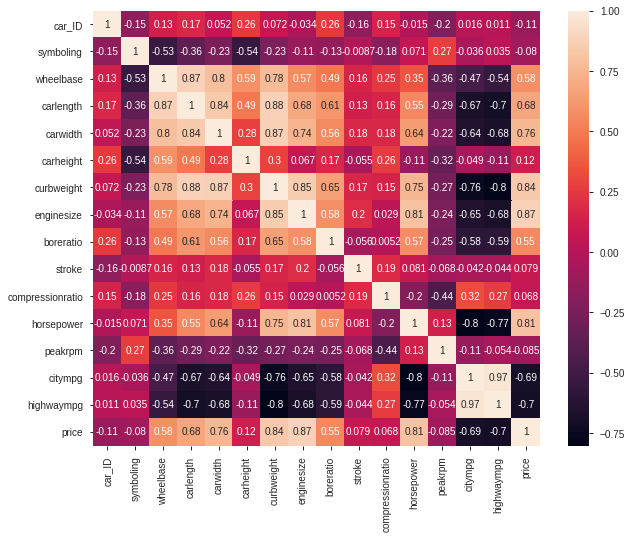

In [65]:
plt.figure(figsize = (10,8))
fig = sns.heatmap(carprice_df.corr(), annot = True )
plt.show()

In [0]:
x = carprice_df[["enginesize","curbweight","carwidth","horsepower"]]
y = carprice_df["price"]

x = sm.add_constant(x)

In [0]:
train_x, test_x, train_y, test_y = train_test_split(x,y, train_size = 0.7, random_state = 100)

In [101]:
model1 = sm.OLS(train_y,train_x).fit()
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:                 OLS               Adj. R-squared:      0.821     
Dependent Variable:    price             AIC:                 2727.7254 
Date:                  2020-05-25 10:10  BIC:                 2742.5396 
No. Observations:      143               Log-Likelihood:      -1358.9   
Df Model:              4                 F-statistic:         164.3     
Df Residuals:          138               Prob (F-statistic):  1.91e-51  
R-squared:             0.826             Scale:               1.0884e+07
------------------------------------------------------------------------
              Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
------------------------------------------------------------------------
const      -49628.1764 14740.5349 -3.3668 0.0010 -78774.6884 -20481.6645
enginesize     66.4070    15.4928  4.2863 0.0000     35.7730     97.0410
curbweight      3.4447     1.3718  2.5110 0.0132      0.7321      6.1572
carwidth      626.8236   258.0146  2.4294 0.0164    116.6505   1136.9967
horsepower     42.5997    12.3558  3.4478 0.0007     18.1686     67.0307
------------------------------------------------------------------------
Omnibus:                 36.489         Durbin-Watson:            1.799 
Prob(Omnibus):           0.000          Jarque-Bera (JB):         92.927
Skew:                    1.009          Prob(JB):                 0.000 
Kurtosis:                6.394          Condition No.:            139106
========================================================================
* The condition number is large (1e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [102]:
y_pred = model1.predict(test_x)
r2_score(test_y, y_pred)

0.7922526764020832

In [0]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [0]:
from sklearn.linear_model import Lasso
ls = Lasso()

In [0]:
y = 
x = 
train_x, test_x, train_y, test_y = train_test_split(x,y, train_size = 0.7, random_state = 100)

In [128]:
carprice_df = pd.get_dummies(columns = [""]


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [134]:
columns = list(carprice_df.select_dtypes(exclude = np.number).columns)
columns.pop(['car_name','car_company'])

TypeError: ignored

In [132]:
columns.

['car_company',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']